# STA 208: Homework 1 (Do not distribute)

## Due 4/12/19 midnight 

__Instructions:__ To make grading easier for the TAs please submit it on canvas in a zip file with either the scanned solutions clearly written or in the jupyter notebook below.  The zip file should include all of your code either in this notebook file, or a separate python file that is imported and ran in this notebook.  We should be able to open this notebook and run everything here by running the cells in sequence.  The written portions can be either done in markdown and TeX in new cells or written clearly by hand and scanned.

- Code should be well organized and documented
- All math should be clear and make sense sequentially
- When in doubt explain what is going on
- You will be graded on correctness of your math, code efficiency and succinctness, and conclusions and modelling decisions

__Exercise 1__ (20 pts)

Consider the binary classification setting where the training data is $x_i \in \mathbb R^p, y_i \in \{0,1\}, i=1,\ldots,n$ and recall the empirical risk (as a function of the predictor $g : \mathbb R^p \to \{0,1\}$),
$$
R_n(g) = \frac 1n \sum_{i=1}^n \ell(y_i, g(x_i)),
$$
and the true risk is 
$$
R(g) = \mathbb E \ell(Y,g(X))
$$
where $X,Y$ are drawn from their joint distribution $f_{X,Y}(x,y)$.

1. Suppose that the loss function is the Hamming loss, $\ell(y,\hat y) = 1\{ y \ne \hat y\}$.  What is the predictor that minimizes the True risk?  (Hint: derive an expression for this based on the joint distribution - you can use expressions involving conditional probabilities.)  This predictor is called the Bayes rule.
2. Suppose that we know that the Bayes rule can be written in the form, 
$$
h(x) = 1\{ x_j > 0 \}, 
$$
for some $j = 1,\ldots,p$, but we don't know which one.  Now using the empirical risk, what is a reasonable classification algorithm (Hint: you can think of finding a good classifier as a problem of finding $j$).  Describe the fit and predict methods. 
3. (Challenging) Suppose that I told you that for any fixed $g$ the following probability bound holds (from Hoeffding's inequality)
$$
\mathbb P \left\{ |R_n(g) - R(g)| > t \right\} \le 2 \exp \left( - 2 n t^2 \right).
$$
If $p=10$, how many samples would I need to get a classifier $\hat g$, from the previous question, such that 
$$
\mathbb P \left\{ R(\hat g) < R(h) + 0.1 \right\} \ge 0.95.
$$
(Hint: use the union bound)

In [1]:
#Here comes the solution

# Solution for Exercise 1
## 1
When $\ell(y,\hat{y})=1\{y\ne\hat{y}\}$, we have
\begin{align*}
R(g)&=\mathbb{E}_{X,Y}\ell(Y,g(X))\\
&=\mathbb{E}_{X}[\mathbb{E}_{Y|X}[\ell(Y,g(X))|X]]
\end{align*}

Clearly if we can minimize $\mathbb{E}_{Y|X}[\ell(Y,g(X))|X], \forall X$, we can minimize $R(g)$.
And for any given $X$, we assume 

$$P(g(X)=1)=p(X),\ P(g(X)=0)=1-p(X),\ p(X)\in[0,1]$$

We also denote the conditional distribution of $Y$ as $f_{Y|X}(y)$. Now the loss can be write as

\begin{align*}
\mathbb{E}_{Y|X}[\ell(Y,g(X))|X]&=f_{Y|X}(1)P(g(X)=0)+f_{Y|X}(0)P(g(X)=1)\\
&=(1-f_{Y|X}(0))(1-p(X))+f_{Y|X}(0)p(X)\\
&=1-f_{Y|X}(0)-p(X)+2f_{Y|X}(0)p(X)
\end{align*}

The derivative is $-1+2f_{Y|X}(0)$. This means if $f_{Y|X}(0)\le\frac{1}{2}$, the minimizer is $p(X)=1$. Otherwise the minimizer would be $p(X)=0$. Thus the conclusion is

$$g(X)=1\{f_{Y|X}(1)\ge f_{Y|X}(0)\}$$

In words, the best predictor should give the most likely value of $Y$ given $X$

### alternative solution

Condition on X,
$$
\mathbb{E} [\mathbb{E} [\ell(Y,g(X))|X]] = \mathbb E [\mathbb P \{Y \ne g(X) | X \}].
$$
Notice that 
$$
\mathbb P \{Y \ne g(X) | X \} = 1\{ g(X) \ne 0 \} \mathbb P \{Y = 0 | X \} + 1\{ g(X) \ne 1 \} \mathbb P \{Y = 1 | X \}
$$
This is minimized at
$$g(X)=1\{\mathbb P \{Y = 1 | X \} \ge \mathbb P \{Y = 0 | X \}\}$$

This is equivalent to 
$$
g(X) = 1\{ \mathbb P \{Y = 1 | X \} \ge 1/2 \}
$$

## Yet another solution

Condition on Y so that risk is
$$
\int 1\{ g(x) = 0 \} P\{Y=1\} f(x | Y=1) + 1\{g(x) = 1\} P\{Y=0\} f(x | Y=0) dx.
$$
The integrand is minimized at
$$
g(x) = 1\left\{ f(x|Y=1) / f(x|Y=0) > P\{Y=0\}/P\{Y=1\} \right\}.
$$
Notice that this, the Bayes rule, compares the likelihood ratio to a fixed threshold.

## 2
Fit:

We can define predictor $g_k(x)=1\{x_k>0\}$ and loss $R_{n,k}=\frac{1}{n}\sum_{i=1}^n \ell(y_i,g_k(x_i))$. Then the estimate of $j$ would be

$$\hat{j} = \underset{k}{argmin}\ R_{n,k}$$

Predict:

$$\hat{y} = 1\{x_{\hat{j}}>0\}$$
## 3 Solution 1
For simpicity we define events

$$A_k(n,t)=\{|R_n(\hat{g}_k)-R(\hat{g}_k)|>t\}$$

Then we know

$$P(A_k(n,t))\le 2\exp(-2nt^2)$$

Then

$$P(\underset{k}{\cup} A_k(n,t))\le\sum_{k=1}^p P(A_k(n,t))=2p\exp(-2nt^2)$$

$$P(\underset{k}{\cap} A_k^c(n,t))\ge 1-2p\exp(-2nt^2)$$

Write this explicitly, it becomes

$$P(|R_n(\hat{g}_k)-R(\hat{g}_k)|\le t,\forall k\in\{1,2,...,p\})\ge 1-2p\exp(-2nt^2)$$

This means with probability $1-2p\exp(-2nt^2)$, for all $\hat{g}_k=1\{x_k>0\}$ we have $|R_n(\hat{g}_k)-R(\hat{g}_k)|\le t$

Now under the assumption that $|R_n(\hat{g}_k)-R(\hat{g}_k)|\le t,\forall k$ is true, we choose $t=0.05$ we have 

$$R(\hat{g})\le R_n(\hat{g})+0.05 \le R_n(h)+0.05 \le R(h)+0.1$$

The second $\le$ comes from $R_n(\hat{g})\le R_n(h)$. This is true because of the way we choose $\hat{g}$. So in conclusion we have

\begin{align*}
P(R(\hat{g})<R(h)+0.1) &\ge P(|R_n(\hat{g}_k)-R(\hat{g}_k)|\le 0.05,\forall k\in\{1,2,...,10\})\\
&\ge 1-20\exp(-\frac{n}{200})
\end{align*}

Now we only need to guarantee 

$$1-20\exp(-\frac{n}{200})\ge 0.95$$

$$n\ge 400\log(20)\approx 1198.293$$

So we know that when $n=1199$ it is enough.

## 3 Common mistake
Some of your solutions:

\begin{align*}
P(R(\hat{g})-R(h)<0.1)&=P(R(\hat{g})-R_n(\hat{g})+R_n(\hat{g})-R_n(h)+R_n(h)-R(h)<0.1)\\
&\ge P(R(\hat{g})-R_n(\hat{g})<0.05 \cap R_n(h)-R(h)<0.05)\\
&=1-P(R(\hat{g})-R_n(\hat{g})\ge0.05 \cup R_n(h)-R(h)\ge0.05)\\
&\ge 1-P(R(\hat{g})-R_n(\hat{g})\ge0.05) - P(R_n(h)-R(h)\ge0.05)\\
\end{align*}

It is tempting to apply the concentration inequality on each term.  The issue is that $\hat g$ is random and dependent on the data, so you cannot apply the concentration inequality without using the union bound as above.

In [2]:
#Here comes the problems

__Exercise 2__ (20 pts)

Consider the regression setting in which $x_i \in \mathbb R^p$ and $y_i \in \mathbb R$, for $i=1,\ldots,n$ and $p < n$.

1. For a given regressor, let $\hat y_i$ be prediction given $x_i$, and $\hat y$ be the vector form.  Show that both linear regression and k-nearest neighbors can be written in the form
$$
\hat y = H y,
$$
where $H$ is dependent on $X$ (the matrix of where each row is $x_i$), assuming that $p < n$ and $X$ is full rank.  Give an expression for $H$ or an algorithm for computing $H$.  Assume that the KNN algorithm will use the same point as its own nearest neighbor (this is consistent with what you get if you use the same dataset in fit and predict in sklearn.)
2. Give a simple modification to your algorithm to compute the KNN's $H$ matrix so that a sample does not use its own point.  Derive an expression for the leave-one-out cross validated squared error based on this $H$. 
3. For linear regression (with $p < n$ and $X$ is full rank), let $X = U D V^\top$ be the singular value decomposition where $U$ is $n \times p$, and $V, D$ is $p \times p$ ($D$ is diagonal). Derive an expression for the OLS coefficients $\beta = A b$ such that $A$ is $p \times p$ and depends on $V$ and $D$, and $b$ is a $p$ vector and does not depend on $D$.  Describe a fit method that precomputes these quantities separately, and describe a predict method.
4. Consider a regressor that performs OLS using the SVD above, but every instance of D will only use the largest $r$ values on the diagonal.  Call this new $r \times r$ matrix $D_r$ ($r < p$), and let $U_r, V_r^\top$ be the $n \times r$ and $r \times p$ matrices which are these restricted to the top $r$ eigenvectors.  Then the new coefficient vector is the OLS computed as if the design matrix is modified by $X \gets U_r D_r V_r^\top$.  Given that you have computed $b$ already, how could you make a method `change_rank` that recomputes $A$ with $D_r$ instead of $D$?  What is its computational complexity (it should not depend on n)?

In [3]:
#Here comes the solutions

# Solution for Exercise 2
#### 1
For linear regression we should all know 

$$H = X(X^TX)^{-1}X^T$$

For KNN we can give the following algorithm:

  * Initialize H as a zero matrix, $n\times n$
  * Initialize D as a zero matrix, $n\times n$
  * Calculate $D_{i,j}=d(x_i, x_j)$ as the distance between $i^{th}$ and $j^{th}$ sample. If $d(x,y)=d(y,x)$, assign $D_{j,i}=D_{i,j}$.
  * For every $i\in\{1,2,\cdots,n\}$, find $s_1, s_2,\cdots s_k$ s.t. $D_{i,s_1}, D_{i,s_2},\cdots,D_{i,s_k}$ are the smallest $k$ numbers in $D_{i,:}$. Assign $H_{i,s_1},H_{i,s_2},\cdots,H_{i,s_k}$ to be $\frac{1}{k}$
  * Call this Algorithm 1
  
#### 2
We can change the algorithm as following:
  
  * After calculating all $D_{i,j}$, set $D_{m,m}=+\infty, \forall m\in\{1,2,\cdots,n\}$
  * Call this Algorithm 2
  
leave-one-out expression is intractable. But we can use the $H$ come from Algorithm 2 and calculate $\hat{y}=Hy$ and calculated MSE loss.

$$
\sum_i (y_i - (H y)_i)^2
$$

#### 3
Since $X$ is full rank and $p<n$, here are some results we can use:

$$D^{-1}\textrm{ exists and }D^T=D$$
$$U^TU=I_{p\times p}\ne UU^T$$
$$V^TV=VV^T=I_{p\times p}$$

We have

\begin{align*}
\hat{\beta}&=(X^TX)^{-1}X^Ty\\
&=(VDU^TUDV^T)^{-1}VDU^Ty\\
&=(VD^2V^T)^{-1}VDU^Ty\\
&=VD^{-2}V^TVDU^Ty\\
&=VD^{-1}U^Ty\\
\end{align*}

Clearly we should choose 

$$A=VD^{-1},\ b=U^Ty$$

Fit method:

  * Get SVD of X=UDV^T. Notice that here $U\in\mathbb{R}^{n\times n}$ so we should only save the first $p$ columns. $D\in\mathbb{R}^{n\times p}$ and we only need the first $p$ rows. 
  * Calculate $A=VD^{-1},\ b=U^Ty$
  
Predict method:

  * Call new data $X^{\prime}\in\mathbb{R}^{m\times p}$
  * $\hat{y}=X^{\prime}Ab$
  
#### 4
To calculate $A$ based on $D_r$ instead of $D$, we can just call the first $r$ columns of $V$ as $V_r$ and we have $A=V_rD_r^{-1}$. The time complexity is $O(pr)$ if you directly multiply the columns by numbers. But you can also say $O(pr^2)$ for matrix multiplication.  This method can be made even more efficient by noticing that $A_r$ is just the first $r$ columns of $A$.  In order to recalculate $\hat \beta$ you multiply $A_r b_r$ where $b_r$ are the first r entries.

In [4]:
#Here comes the problems

__Exercise 3__ (30 pts)

We call the method that zeros out all but $r$ singular values in OLS, singular value regression.  Implement the singular value regressor as a sklearn style class below.  Test it by simulating the training and test data from the `gen_LR_data` function below and calculate the average square error on the test set.  Do this for each choice of `r` in the fit function (from 1 to $p$).

In [5]:
import numpy as np
from scipy.linalg import svd

In [21]:
class SingularValueRegressor:
    """
    : A regression object that uses the SVD to fit and predict
    : Init: specify rank r
    : .fit: solve the SVD of X and precompute beta
    : .predict: Return y hat for X_test
    """
    
    def __init__(self,r):
        """
        : Store the rank
        """
        self.r = r
        
    def fit(self,X,y):
        """
        : Computes and stores the SVD (use scipy.linalg.svd)
        : Computes beta for rank r singular value regression
        """
        U, S, Vh = svd(X)
        p = Vh.shape[0]
        U = U[:,:p]#first p columns so that U is n by p
        index = S!=0
        S[index] = 1/S[index]
        S = np.diag(S)#get diagonal matrix, notice that this is already S^{-1}
        self.A = Vh.transpose().dot(S)
        self.b = U.transpose().dot(y.reshape(-1,1))
        self.change_rank(self.r)
        
    def predict(self,X_test):
        """
        : Outputs the predicted y given the predictors X_test
        """
        y_hat = X_test.dot(self.beta_hat)
        y_hat = y_hat.reshape(-1)
        return y_hat
        
    def change_rank(self,r):
        """
        : Assumes that the SVD has been computed and uses it to change the rank; after
        : running the new regressor object should be as if we fit with the new rank r
        """
        self.r = r
        Ar = self.A[:, :self.r]#p by r
        br = self.b[:self.r, :]#r by 1
        self.beta_hat = Ar.dot(br)

In [22]:
def gen_LR_data(r = 10, p = 20, n = 100):
    """
    : generate data from an approx low rank regression model
    """
    alpha = np.random.chisquare(1,size = (p,r)) #X coefficients
    Z = np.random.normal(size=(n,r)) #X covariates
    beta = np.random.normal(size = r) #reg covs
    mu = Z @ beta #hidden mean
    Xmean = Z @ alpha.T #random transformation of Z
    X = Xmean + np.random.normal(0,.5,size=(n,p)) #add noise - not exactly low rank
    X_test = Xmean + np.random.normal(0,.5,size=(n,p))
    y = mu + np.random.normal(0,1,size=(n))
    y_test = mu + np.random.normal(0,1,size=(n))
    return (X,y,X_test,y_test)

In [35]:
np.random.seed(5)
X,y,X_test,y_test = gen_LR_data()

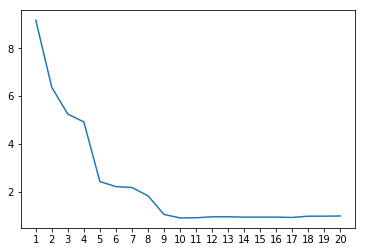

In [36]:
losses = []
SVDRegressor = SingularValueRegressor(20)
SVDRegressor.fit(X,y)
for r in range(1, 21):
    SVDRegressor.change_rank(r)
    y_test_hat = SVDRegressor.predict(X_test)
    losses.append(np.mean((y_test - y_test_hat)**2))

import matplotlib.pyplot as plt
plt.plot(range(1, 21),losses)
plt.xticks(range(1, 21))
plt.show()

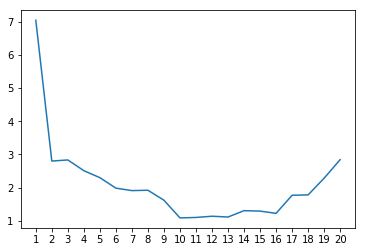

In [37]:
## You can see a more pronounced bias-variance tradeoff if you set n lower

np.random.seed(5)
X,y,X_test,y_test = gen_LR_data(n=30)

losses = []
SVDRegressor = SingularValueRegressor(20)
SVDRegressor.fit(X,y)
for r in range(1, 21):
    SVDRegressor.change_rank(r)
    y_test_hat = SVDRegressor.predict(X_test)
    losses.append(np.mean((y_test - y_test_hat)**2))

import matplotlib.pyplot as plt
plt.plot(range(1, 21),losses)
plt.xticks(range(1, 21))
plt.show()

In [28]:
### Here is some scratch work used to construct the class above

U, S, Vh = svd(X)
p = Vh.shape[0]
U = U[:,:p]#first p columns so that U is n by p
index = S!=0
S[index] = 1/S[index]
S = np.diag(S)#get diagonal matrix, notice that this is already S^{-1}
A = Vh.transpose().dot(S)

__Exercise 4__ (30 pts)

The dataset in the hw1 directory has a Y variable, 7 predictor variables (X1 - X7).  Using sklearn and the class that you constructed above, compare ridge regression, OLS, kNN, and SVRegression.  Compare and tune the methods using appropriate testing procedures.  Comment on the tuning of each parameter in ridge, kNN, and SVRegression in markdown.  Be sure to standardize the X variables first and decide how to deal with NAs.  

In [11]:
import pandas as pd

In [12]:
data_mat = pd.read_csv('hw1_data.csv')
data_mat.head()

,Y,X1,X2,X3,X4,X5,X6,X7
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0


Here we check some statistics of each column

In [13]:
data_mat.describe()

,Y,X1,X2,X3,X4,X5,X6,X7
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


Then we extract the rows with ```NaN``` values

In [14]:
index = data_mat.isnull().sum(axis=1)>0
data_mat[index]

,Y,X1,X2,X3,X4,X5,X6,X7
32,25.0,4.0,98.0,NaN,2046.0,19.0,71.0,1.0
126,21.0,6.0,200.0,NaN,2875.0,17.0,74.0,1.0
330,40.9,4.0,85.0,NaN,1835.0,17.3,80.0,2.0
336,23.6,4.0,140.0,NaN,2905.0,14.3,80.0,1.0
354,34.5,4.0,100.0,NaN,2320.0,15.8,81.0,2.0
374,23.0,4.0,151.0,NaN,3035.0,20.5,82.0,1.0


Here I just used median values to impute missing values. You can also use mean or other reasonable statistics

In [15]:
data_mat = data_mat.fillna(np.nanmedian(data_mat['X3']))
Y = data_mat[['Y']].values
X = data_mat.drop(labels=['Y'], axis=1).values

Now the data is prepared. We can start to use different methods to estimate $y$。

But first I want to make it clear that there is another convenient function ```cross_val_score``` that can be applied here. But it won't fix the folds for different algorithms so I did not use it.

In [16]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
import seaborn as sns

To compare the performance of different algorithms, we should have a reliable way to estimate the performance. Since it's decided that MSE will be the metric, we only need to find a way to calculate MSE. Here are some possible options:

  * Split a training/testing test
  * LOO (Leave-One-Out)
  * K-Fold CV
  
In this document I use 5-Fold CV. Besides, I select the folds first, and then test the performance of each algorithm. The next block generate the index for each fold.

In [17]:
kf = KFold(n_splits=5, shuffle=True, random_state=17)#Fix the results
kf.get_n_splits(X)
train_indices = []
test_indices = []
for train_index, test_index in kf.split(X):
    train_indices.append(train_index)
    test_indices.append(test_index)

## Naive method

Now we try a naive method first: simply use mean to predict. This will be our first benchmark.

In [18]:
losses = []
for index in range(5):
    train = Y[train_indices[index]]
    predictions = np.ones(Y[test_indices[index]].shape)
    predictions *= np.mean(train)
    losses.append(mean_squared_error(predictions, Y[test_indices[index]]))
print(np.mean(losses))

61.356144906220344


##  KNN

For KNN there are many parameters to tune:
 
  * number of neighbor. This changes the shape of fitted function.
  * leaf size. This is related to the method we find nearest neighbor. If we use tree method, then if a leaf has data point less then leaf size, then in this leaf we change to brutal search.
  * weight for each data point. Like constant or related to distance?
  * dististance metric. Like $p$ for $L_p$
  * algorithm. Different algorithms to find nearest neighbor.
  
Here we only standardize data and tune the number of neighbor.

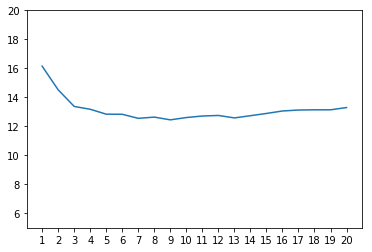

In [19]:
X_new = normalize(X)
KNN_Loss = np.zeros((5,20))
for k in range(1, 21):
    regressor = KNeighborsRegressor(n_neighbors = k)
    for index in range(5):
        regressor.fit(X_new[train_indices[index]], Y[train_indices[index]])
        predictions = regressor.predict(X_new[test_indices[index]])
        KNN_Loss[index, k-1] = mean_squared_error(predictions, Y[test_indices[index]])
plt.plot(range(1, 21), np.mean(KNN_Loss, axis=0))
plt.ylim(5,20)
plt.xticks(range(1, 21))
plt.show()


## Ridge  and SVR

For linear regression methods we should consider transforms for different variables. Here I only check the marginal relations between different $x$ and $y$ and do exponential transformations for $x$. But there are much more you can do:

  * Transform $y$
  * Check interactions
  * Check categorical variables
  * Variable selection
  
To study the marginal relations, we do pairwise plot.

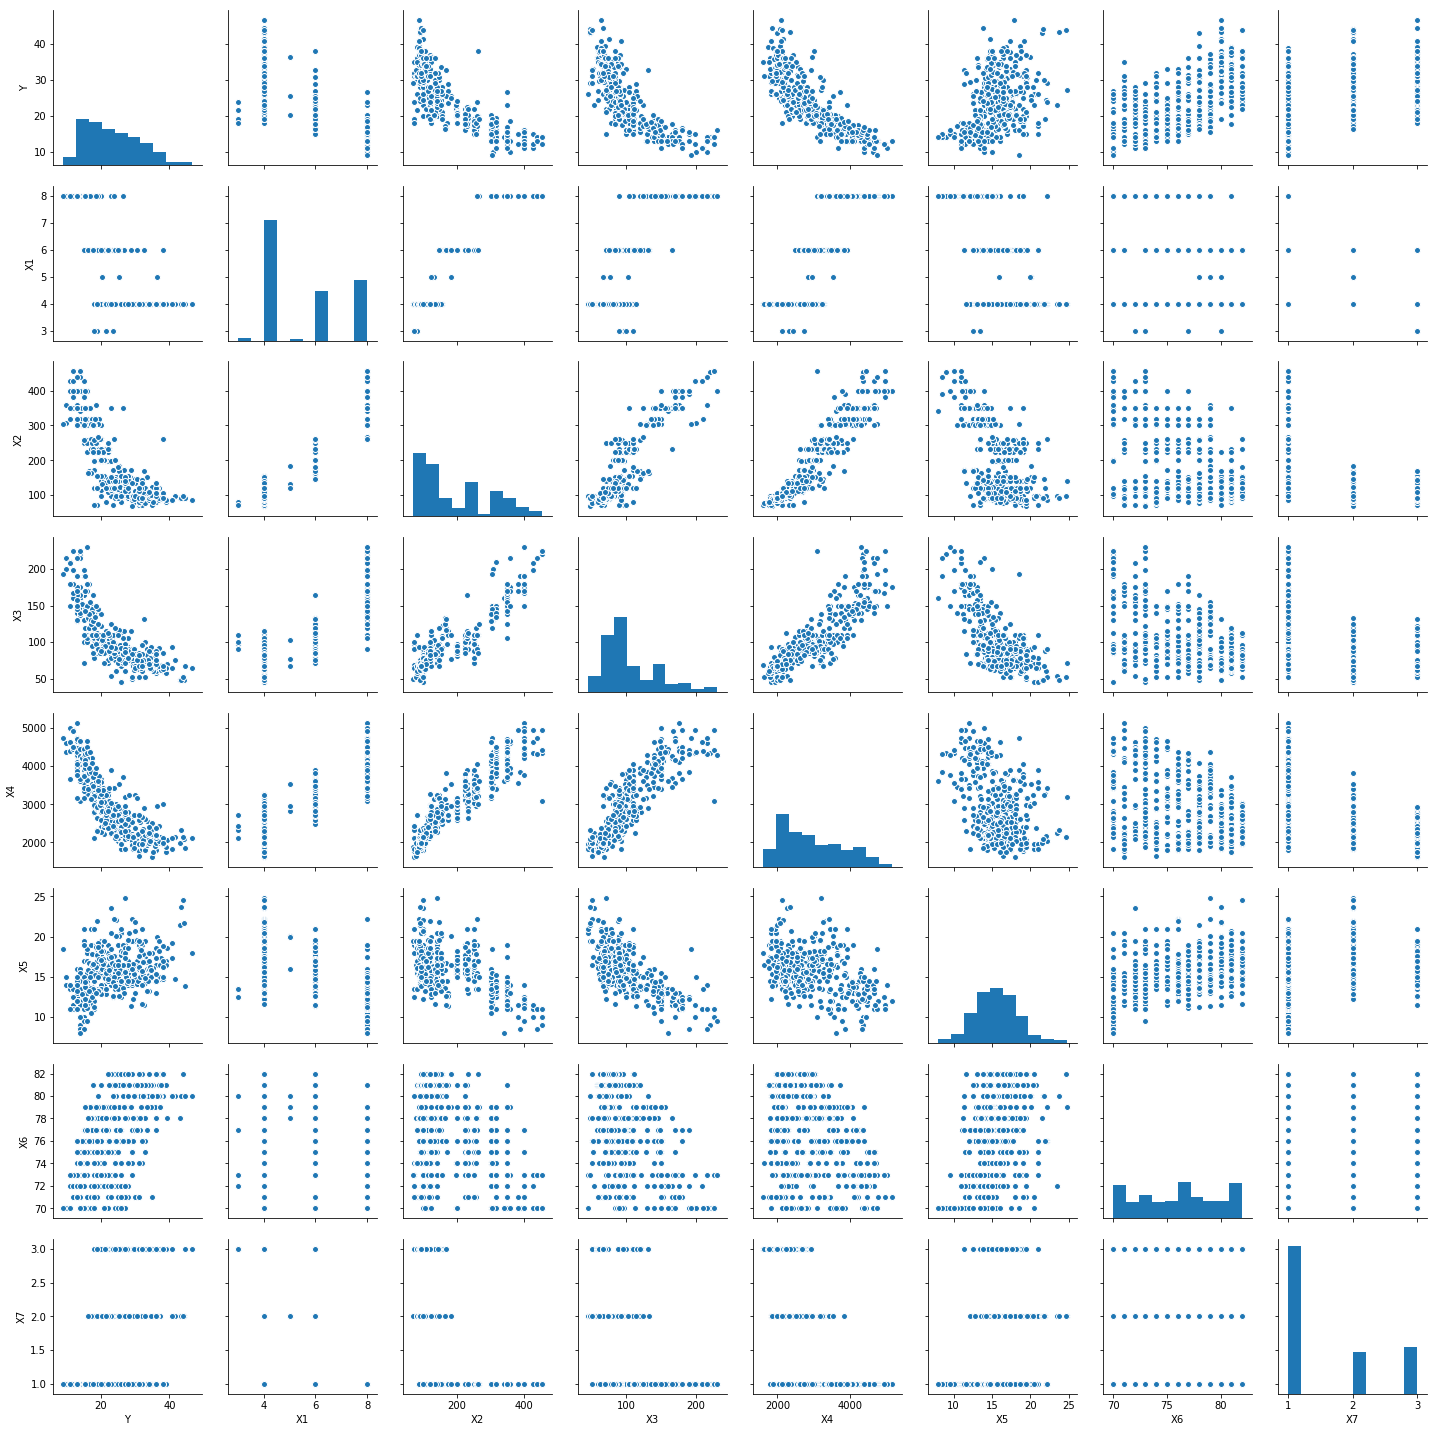

In [20]:
sns.pairplot(data_mat)

It seems that $X_2,\ X_3,\ X_4$'s relationship with $y$ is far from linear. So we regress $\log(y)$ on $\log(x)$ to find a acceptable transform. For simplicity we define the following functions.

In [21]:
def find_exp_coefficient(X, y, col):
    '''
    This functions does regression of log(y)~log(X[:,col]) to check the transform for X[:,col]
    =====================
    Inputs:
    X: 2-d array, each column is a variable
    y: your target
    col: the column index of the variable in X
    '''
    regressor = LinearRegression()
    regressor.fit(np.log(X[:,col].reshape(-1,1)), np.log(y))
    return regressor.coef_[0].item()

In [22]:
def transform_new_X(X, coefs, cols, add_new_feature=False, add_intercept=False):
    '''
    This function changes the original data matrix into a new data matrix, 
    with changing/adding features and/or adding intercept term
    Please make sure len(cols) = len(coefs)
    =====================
    Inputs:
    X: 2-d array. Original data matrix. Each column is a variable
    coefs: 1-d array. Can be empty. If not empty, it should be the exponential coefficients for selected columns
    cols: 1-d array. Can be empty. If not empty, it should be the index (starts from 0) for selected columns
    add_new_feature: boolean. If True, transformed variables will be added, otherwise original variables will be replaced
    add_intercept: boolean. If True, a column of 1s will be added.
    '''
    for i in range(len(cols)):
        if add_new_feature:
            X = np.concatenate((X, np.power(X[:,cols[i]], coefs[i]).reshape(-1,1)), axis=1)
        else:
            X[:, cols[i]] = np.power(X[:,cols[i]], coefs[i])
    if add_intercept:
        X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)
    return X

In [23]:
def get_ridge_loss(X, y, train_indices, test_indices, lambds):
    '''
    This functions quickly fits Ridge Regression for different lambdas and return the losses
    =====================
    Inputs:
    X: 2-d array. Data matrix
    y: target
    train_indices: a list. Each element should be a list of indices of training samples. 
                   Do not be a single list of indices if there is only one training_set.
                   For example, don''t use [0, 1, 2, 3, 4] but [[0, 1, 2, 3, 4]]
    test_indices: a list. Each element should be a list of indices of testing samples. 
                  Same things to be careful with as train_indices
    lambdas: different lambdas/alphas you want to try. Suggested to be a fix interval array
    '''
    K = len(train_indices)#number of folds
    L = len(lambds)#number of lambdas
    Ridge_Loss = np.zeros((K, L))
    for i in range(L):
        lambd = lambds[i]
        regressor = Ridge(alpha=lambd)
        for index in range(K):
            regressor.fit(X_new[train_indices[index]], Y[train_indices[index]])
            predictions = regressor.predict(X_new[test_indices[index]])
            Ridge_Loss[index, i] = mean_squared_error(predictions, Y[test_indices[index]])
    return np.mean(Ridge_Loss, axis=0)    

In [24]:
def get_svr_loss(X, y, train_indices, test_indices):
    '''
    This functions quickly fits SVR for different ranks and return the losses
    =====================
    Inputs:
    Same as get_ridge_loss
    '''
    ranks = range(1, min(X.shape)+1)#from 1 to full rank
    K = len(train_indices)#number of folds
    L = len(ranks)#number of ranks
    Ridge_Loss = np.zeros((K, L))
    SVR_Loss = np.zeros((K, L))
    for index in range(K):
        X_train = X_new[train_indices[index]]
        Y_train = Y[train_indices[index]]
        X_test = X_new[test_indices[index]]
        Y_test = Y[test_indices[index]]
        SVRegressor = SingularValueRegressor(r=ranks[-1])
        SVRegressor.fit(X_train, Y_train)
        for r in range(L):
            SVRegressor.change_rank(ranks[r])
            Y_predictions = SVRegressor.predict(X_test)
            SVR_Loss[index, r] = mean_squared_error(Y_predictions, Y_test)
    return np.mean(SVR_Loss, axis=0)   

## Different options

Begins here we try some different fitting options:

  * Use original data
  * Replace X2, X3, X4 (Two methods)
  * Insert transformed X2, X3, X4
  * Insert intercept or not (only SVR)

And We plot different losses in the same plot (using same $\lambda$ or ranks of course) 

In [25]:
#set up, choosing lambda
lambds = np.linspace(0, 20, 51)

## Original data

In [26]:
Original_Ridge_Loss = get_ridge_loss(X, y, train_indices, test_indices, lambds)
Original_SVR_Loss = get_svr_loss(X, y, train_indices, test_indices)
X_new = transform_new_X(X, [], [], add_new_feature=False, add_intercept=True)
Original_SVR_Loss_Intercept = get_svr_loss(X_new, y, train_indices, test_indices)

## Replace X with transformed values

In [27]:
coefs = [find_exp_coefficient(X, Y, col) for col in [1, 2, 3]]
coefs

[-0.5501840800877394, -0.8428821254719747, -1.0582680360393397]

Now we have two choices. One is the do $x\rightarrow x^{\beta}$, which means we do exactly as the regression tells us. Another is to do $x\rightarrow x^{\hat{\beta}}$, which means we find some 'reasonble' value near the fitted values and transform. Here we do both.

In [28]:
#first method
X_new = transform_new_X(X, coefs, [1, 2, 3], add_new_feature=False, add_intercept=False)
Replace_Exact_Ridge_Loss = get_ridge_loss(X_new, y, train_indices, test_indices, lambds)
Replace_Exact_SVR_Loss = get_svr_loss(X_new, y, train_indices, test_indices)
X_new = transform_new_X(X, coefs, [1, 2, 3], add_new_feature=False, add_intercept=True)
Replace_Exact_SVR_Loss_Intercept = get_svr_loss(X_new, y, train_indices, test_indices)

In [29]:
#second method
X_new = transform_new_X(X, [-0.5, -0.8, -1], [1, 2, 3], add_new_feature=False, add_intercept=False)
Replace_Approx_Ridge_Loss = get_ridge_loss(X_new, y, train_indices, test_indices, lambds)
Replace_Approx_SVR_Loss = get_svr_loss(X_new, y, train_indices, test_indices)
X_new = transform_new_X(X, [-0.5, -0.8, -1], [1, 2, 3], add_new_feature=False, add_intercept=True)
Replace_Approx_SVR_Loss_Intercept = get_svr_loss(X_new, y, train_indices, test_indices)

## Add new features

In [30]:
#first method, here you might see the warnings, which means we might have introduced colinearity
X_new = transform_new_X(X, coefs, [1, 2, 3], add_new_feature=True, add_intercept=False)
Add_Exact_Ridge_Loss = get_ridge_loss(X_new, y, train_indices, test_indices, lambds)
Add_Exact_SVR_Loss = get_svr_loss(X_new, y, train_indices, test_indices)
X_new = transform_new_X(X, coefs, [1, 2, 3], add_new_feature=True, add_intercept=True)
Add_Exact_SVR_Loss_Intercept = get_svr_loss(X_new, y, train_indices, test_indices)

/Users/lifengwei/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.3077877123987193e-18 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/lifengwei/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.0806120475708617e-18 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/lifengwei/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.100202089794476e-18 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/lifengwei/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve


In [31]:
#second method, here you might see the warnings, which means we might have introduced colinearity
X_new = transform_new_X(X, [-0.5, -0.8, -1], [1, 2, 3], add_new_feature=True, add_intercept=False)
Add_Approx_Ridge_Loss = get_ridge_loss(X_new, y, train_indices, test_indices, lambds)
Add_Approx_SVR_Loss = get_svr_loss(X_new, y, train_indices, test_indices)
X_new = transform_new_X(X, [-0.5, -0.8, -1], [1, 2, 3], add_new_feature=True, add_intercept=True)
Add_Approx_SVR_Loss_Intercept = get_svr_loss(X_new, y, train_indices, test_indices)

/Users/lifengwei/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 7.75965149166299e-18 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/lifengwei/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 7.237817993672899e-18 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/lifengwei/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 7.288189767780809e-18 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/lifengwei/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill

## Visualize Resutls

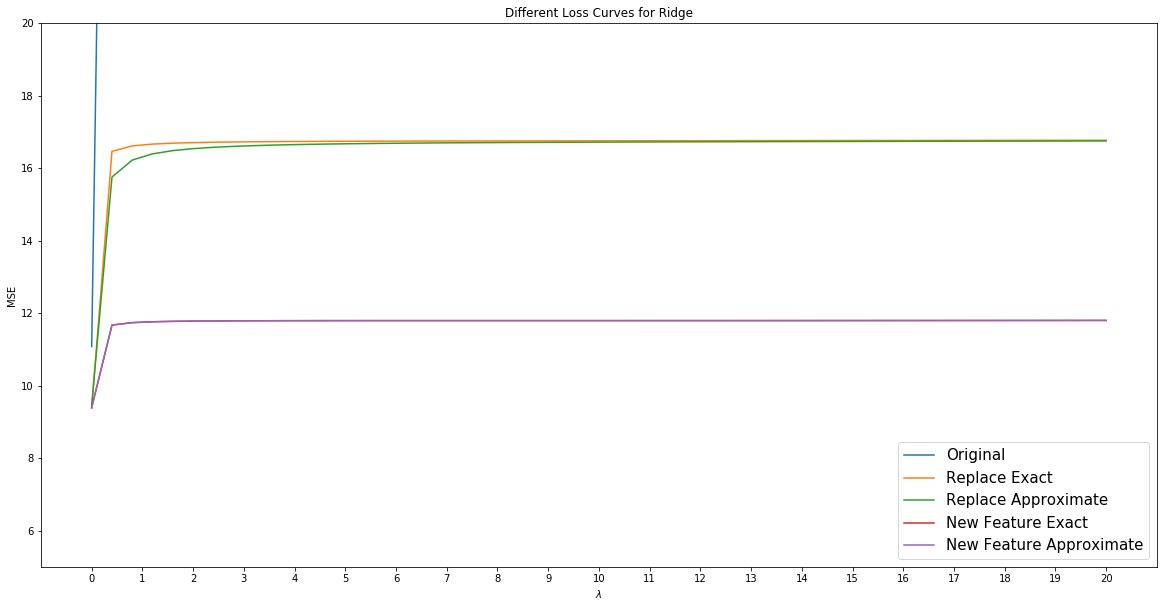

In [32]:
#Ridge
plt.figure(figsize = (20, 10))
plt.plot(lambds, Original_Ridge_Loss, label='Original')
plt.plot(lambds, Replace_Exact_Ridge_Loss, label='Replace Exact')
plt.plot(lambds, Replace_Approx_Ridge_Loss, label='Replace Approximate')
plt.plot(lambds, Add_Exact_Ridge_Loss, label='New Feature Exact')
plt.plot(lambds, Add_Approx_Ridge_Loss, label='New Feature Approximate')
plt.title('Different Loss Curves for Ridge')
plt.xlabel(r'$\lambda$')
plt.ylabel('MSE')
plt.ylim(5, 20)
plt.xticks(np.linspace(0, 20, 21))
plt.legend(loc=4, fontsize=15)
plt.show()

We can see that introducing new features does reduce the MSE and also makes the model more sensitive to $\lambda$

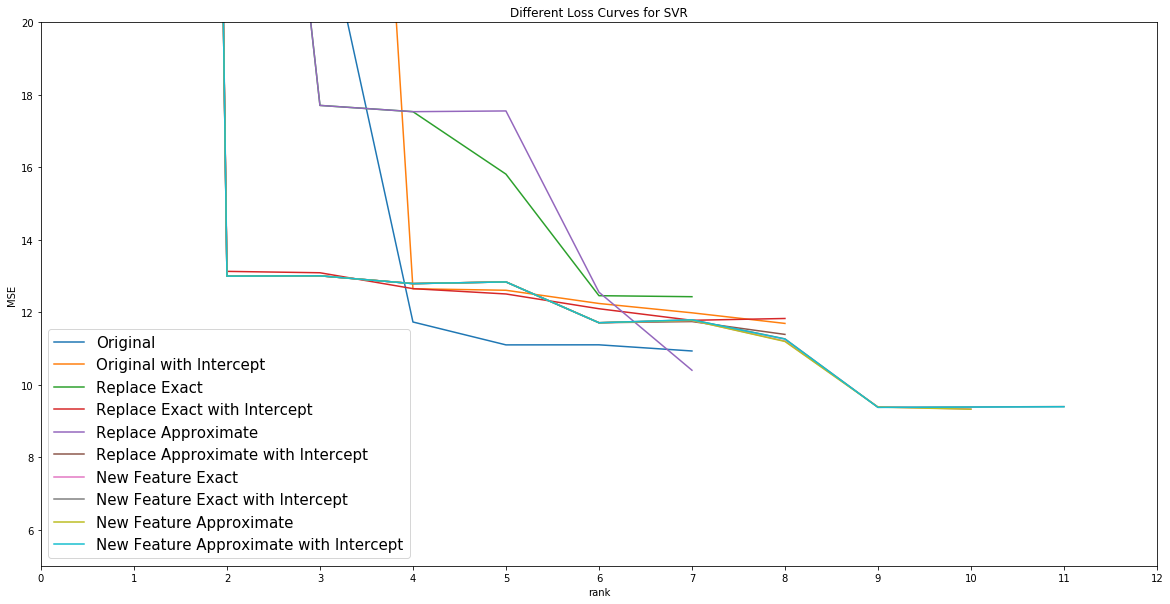

In [33]:
#SVR, please comment out the lines that you don't want to see
plt.figure(figsize = (20, 10))
plt.plot(range(1,8), Original_SVR_Loss, label='Original')
plt.plot(range(1,9), Original_SVR_Loss_Intercept, label='Original with Intercept')
plt.plot(range(1,8), Replace_Exact_SVR_Loss, label='Replace Exact')
plt.plot(range(1,9), Replace_Exact_SVR_Loss_Intercept, label='Replace Exact with Intercept')
plt.plot(range(1,8), Replace_Approx_SVR_Loss, label='Replace Approximate')
plt.plot(range(1,9), Replace_Approx_SVR_Loss_Intercept, label='Replace Approximate with Intercept')
plt.plot(range(1,11), Add_Exact_SVR_Loss, label='New Feature Exact')
plt.plot(range(1,12), Add_Exact_SVR_Loss_Intercept, label='New Feature Exact with Intercept')
plt.plot(range(1,11), Add_Approx_SVR_Loss, label='New Feature Approximate')
plt.plot(range(1,12), Add_Approx_SVR_Loss_Intercept, label='New Feature Approximate with Intercept')
plt.title('Different Loss Curves for SVR')
plt.xlabel('rank')
plt.ylabel('MSE')
plt.ylim(5, 20)
plt.xticks(np.linspace(0, 12, 13))
plt.legend(loc=3, fontsize=15)
plt.show()

For SVR we can see with low rank approximations, the loss is extremely huge (notice the slope in the plot). And as rank get closes to full rank, the decrease in MSE also gets very small. Besides we can see adding the intercept term is greatly helpful.